In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Read and Rename the columns
inequality = pd.read_csv('/workspaces/codespaces-jupyter/data/inequality.csv')
inequality = inequality.rename(columns={'Gini coefficient (before tax) (World Inequality Database)':'Inequality'})
gdp = pd.read_csv('/workspaces/codespaces-jupyter/data/gdp-per-capita-penn-world-table.csv')
gdp = gdp.rename(columns={'Entity': 'Country','GDP per capita (output, multiple price benchmarks)':'GDP'})

# Merge the dataframes
merged_df = pd.merge(gdp, inequality, on=['Country', 'Year'])
merged_df = merged_df.iloc[:, :5]
merged_df = merged_df.drop(columns=['Year'])
merged_df = merged_df.dropna()
merged_corr = merged_df.corr().round(2)



/tmp/ipykernel_58964/1950569239.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_corr = merged_df.corr().round(2)


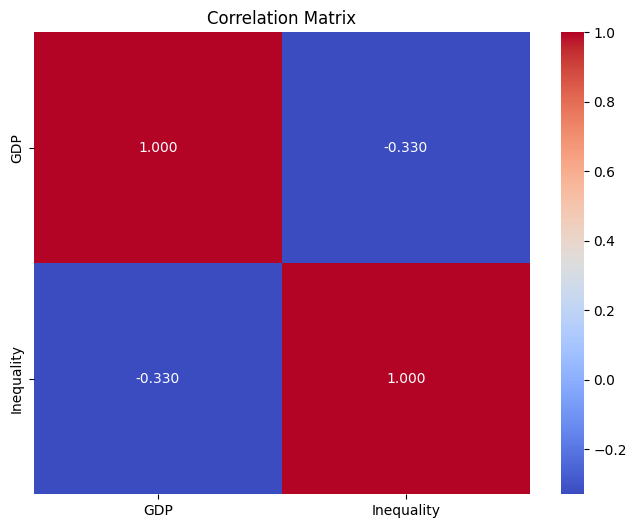

In [2]:
plt.figure(figsize=(8, 6))
sns.heatmap(merged_corr.round(2), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

In [3]:
merged_corr

,GDP,Inequality
GDP,1.00,-0.33
Inequality,-0.33,1.00
